#Loading MNIST DATA

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import helper
%matplotlib inline

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2000, shuffle=True)

In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
images.shape

torch.Size([2000, 1, 28, 28])

In [ ]:
torch.mean(images)

tensor(0.1292)

In [ ]:
torch.std(images)

tensor(0.3064)

In [ ]:
# Define a transform to normalize the data

# Normalize ((mean,),(std))
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.13,),(0.3,)),])

# Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#**Problem 1: Constructing the network model**
###FNC class를 정의하고 model을 생성하세요
- input layer
  - number of input features를 hidden unit 128개로 선형변환 및 ReLU activation function
- Hidden layer
  - 128 hidden unit을 64개의 hidden unit으로 선형변환 및 ReLU
- Output layer
  - 64개 hidden unit을 10개 class로 분류하기 위한 output layer
  - 최종 layer의 activation은 없음 (linear layer)

In [ ]:
class FCN(nn.Module):
  def __init__(self, input_layer):
    super().__init__()
    self.seq = nn.Sequential(nn.Linear(input_layer, 128),
                            nn.ReLU(True),
                            nn.Linear(128, 64),
                            nn.ReLU(True),
                            nn.Linear(64, 10)
                            )


  def forward(self, x):
    return self.seq(x)


In [ ]:
model = FCN(784)

In [ ]:
model

FCN(
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

#Loss Functions in PyTorch

- nn.CrossEntropyLoss

In [ ]:
criterion = nn.CrossEntropyLoss()
# Get our data
images, labels = next(iter(trainloader))
#flatten images
images = images.reshape(images.shape[0], -1)

# Forward pass, get our log-probabilities
logits = model(images)
# Calculate the Loss with the Logps and the Labels
loss = criterion(logits, labels)

In [ ]:
print(loss)

tensor(2.3174, grad_fn=<NllLossBackward0>)


#Problem 2: Implement softmax

\begin{align}y_k = {exp(a_k)}/{\sum_{i=1}^{n}(exp(a_i))}\end{align}

- torch.sum
- torch.exp
- broadcast reshape 사용

In [ ]:
logits.shape

torch.Size([64, 10])

In [ ]:
#enumerate(?)
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).reshape(-1,1)

In [ ]:
ps = softmax(logits)
ps

tensor([[0.0943, 0.0863, 0.1047, 0.0918, 0.1104, 0.1303, 0.0958, 0.0941, 0.0887,
         0.1036],
        [0.0899, 0.0858, 0.1021, 0.0938, 0.1142, 0.1206, 0.0937, 0.0896, 0.1047,
         0.1057],
        [0.0860, 0.0904, 0.1086, 0.0934, 0.1141, 0.1211, 0.0921, 0.0916, 0.1060,
         0.0967],
        [0.0897, 0.0935, 0.1021, 0.0965, 0.1120, 0.1144, 0.0976, 0.1013, 0.1045,
         0.0884],
        [0.0860, 0.0929, 0.1084, 0.0905, 0.1149, 0.1108, 0.0899, 0.0884, 0.1147,
         0.1035],
        [0.0942, 0.0838, 0.1149, 0.0918, 0.1068, 0.1227, 0.0861, 0.0968, 0.0947,
         0.1083],
        [0.0898, 0.0855, 0.1031, 0.0944, 0.1159, 0.1309, 0.0999, 0.0869, 0.0962,
         0.0975],
        [0.0992, 0.0908, 0.1014, 0.0932, 0.1112, 0.1184, 0.0955, 0.1017, 0.0931,
         0.0955],
        [0.0940, 0.0877, 0.0959, 0.0863, 0.1146, 0.1030, 0.0889, 0.1032, 0.1123,
         0.1142],
        [0.0836, 0.0880, 0.1049, 0.0984, 0.1035, 0.1339, 0.0848, 0.1000, 0.1009,
         0.1019],
        [0

In [ ]:
torch.sum(ps, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward1>)

In [ ]:
y=torch.exp(logits)
y.shape

torch.Size([64, 10])

In [ ]:
z = torch.sum(torch.exp(logits),dim=1).reshape(-1,1)
z.shape

torch.Size([64, 1])

In [ ]:
z

tensor([[10.0443],
        [ 9.8763],
        [ 9.9105],
        [10.1532],
        [ 9.6335],
        [10.0076],
        [10.1331],
        [10.2874],
        [10.1583],
        [ 9.9741],
        [ 9.9119],
        [10.0316],
        [ 9.5044],
        [ 9.9909],
        [10.1012],
        [ 9.8718],
        [10.2000],
        [10.3102],
        [ 9.5313],
        [ 9.8380],
        [10.0470],
        [10.2420],
        [10.1699],
        [ 9.4312],
        [ 9.6237],
        [ 9.9107],
        [ 9.8656],
        [10.2315],
        [ 9.8870],
        [ 9.9438],
        [ 9.9773],
        [ 9.8329],
        [10.1009],
        [ 9.9931],
        [10.1758],
        [ 9.7186],
        [ 9.6055],
        [10.1040],
        [ 9.8296],
        [ 9.9965],
        [10.0820],
        [ 9.9432],
        [10.1921],
        [10.2551],
        [10.0680],
        [10.2583],
        [10.2033],
        [ 9.8760],
        [10.2136],
        [10.2533],
        [10.1506],
        [10.0578],
        [ 9.

In [ ]:
for i in logits[0][:]:
  print('logits', i)

logits tensor(-0.0547, grad_fn=<UnbindBackward0>)
logits tensor(-0.1430, grad_fn=<UnbindBackward0>)
logits tensor(0.0500, grad_fn=<UnbindBackward0>)
logits tensor(-0.0810, grad_fn=<UnbindBackward0>)
logits tensor(0.1037, grad_fn=<UnbindBackward0>)
logits tensor(0.2691, grad_fn=<UnbindBackward0>)
logits tensor(-0.0387, grad_fn=<UnbindBackward0>)
logits tensor(-0.0560, grad_fn=<UnbindBackward0>)
logits tensor(-0.1151, grad_fn=<UnbindBackward0>)
logits tensor(0.0397, grad_fn=<UnbindBackward0>)


In [ ]:
z = torch.sum(torch.exp(logits[0]))
zz = torch.exp(logits[0][0])
print(zz/z)

tensor(0.0943, grad_fn=<DivBackward0>)


In [ ]:
for i ,j in enumerate(logits):
  print(i," = ",j)
  for k,l in enumerate(j):
    print(i,k," = ",l)

0  =  tensor([-0.0547, -0.1430,  0.0500, -0.0810,  0.1037,  0.2691, -0.0387, -0.0560,
        -0.1151,  0.0397], grad_fn=<UnbindBackward0>)
0 0  =  tensor(-0.0547, grad_fn=<UnbindBackward0>)
0 1  =  tensor(-0.1430, grad_fn=<UnbindBackward0>)
0 2  =  tensor(0.0500, grad_fn=<UnbindBackward0>)
0 3  =  tensor(-0.0810, grad_fn=<UnbindBackward0>)
0 4  =  tensor(0.1037, grad_fn=<UnbindBackward0>)
0 5  =  tensor(0.2691, grad_fn=<UnbindBackward0>)
0 6  =  tensor(-0.0387, grad_fn=<UnbindBackward0>)
0 7  =  tensor(-0.0560, grad_fn=<UnbindBackward0>)
0 8  =  tensor(-0.1151, grad_fn=<UnbindBackward0>)
0 9  =  tensor(0.0397, grad_fn=<UnbindBackward0>)
1  =  tensor([-0.1191, -0.1654,  0.0084, -0.0765,  0.1199,  0.1745, -0.0772, -0.1226,
         0.0331,  0.0434], grad_fn=<UnbindBackward0>)
1 0  =  tensor(-0.1191, grad_fn=<UnbindBackward0>)
1 1  =  tensor(-0.1654, grad_fn=<UnbindBackward0>)
1 2  =  tensor(0.0084, grad_fn=<UnbindBackward0>)
1 3  =  tensor(-0.0765, grad_fn=<UnbindBackward0>)
1 4  =  ten

# Problem 3:Finding the Highest probability index

- input: sample 별 확률값을 받음
- output: sample 벼로 가장 높은 확률값의 index를 return
- 유용할 수 있는 함수
  - torch.argmax(x, dim=)

In [ ]:
def get_pred(ps):
  return torch.argmax(ps, dim=1)

In [ ]:
get_pred(ps)

tensor([5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 9, 8, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5,
        5, 9, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 8, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
        8, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 8, 5, 5, 4, 5])

In [ ]:
labels
# 정답 레이블과 예측값이랑 같지 않다.
# 아직 모델 학습을 하지 않았기 때문이다.

tensor([6, 3, 9, 2, 7, 8, 6, 1, 7, 6, 9, 2, 6, 5, 5, 2, 3, 5, 0, 2, 3, 7, 1, 6,
        0, 7, 6, 7, 9, 2, 5, 4, 7, 4, 7, 7, 0, 2, 5, 9, 3, 0, 1, 9, 0, 1, 2, 4,
        9, 0, 1, 3, 2, 3, 4, 3, 9, 1, 7, 2, 4, 9, 7, 0])

# Calculating Gradients

x.backward()는 gradient를 계산해준다.

In [ ]:
print('Before backward pass: \n', model.seq[0].weight.grad)

loss.backward()

print('After backward pass: \n', model.seq[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0029, -0.0029, -0.0029,  ..., -0.0029, -0.0029, -0.0029],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015]])


# Training the network!
- network parameter에 대한 loss function의 gradient를 구했으니, 최적화를 할 수 있다.
- 최적화 기법은 SGD 이외에도 많으며, optim package에서 찾아 사용할 수 있다.
- 예를 들어서 SGD는 optim.SGD를 통해서 불러올 수 있습니다.


In [ ]:
from torch import optim
# Optimizers require the parameters to optimize and a Learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print('Initial weights - ',model.seq[0].weight)

images, labels = next(iter(trainloader))
images = images.reshape(64,-1)

# Clear thr gradients, do this because gradients are accumuLated
optimizer.zero_grad()

# Forward pass, then bacward pass, then update weights
output = model(images)
loss= criterion(output, labels)
loss.backward()
optimizer.step()

print('Gradient -', model.seq[0].weight)

Initial weights -  Parameter containing:
tensor([[-0.0162,  0.0014,  0.0305,  ..., -0.0288,  0.0251, -0.0318],
        [-0.0057, -0.0327,  0.0190,  ..., -0.0039,  0.0356,  0.0008],
        [-0.0243, -0.0007, -0.0061,  ...,  0.0091, -0.0013,  0.0048],
        ...,
        [ 0.0154,  0.0177, -0.0091,  ..., -0.0348,  0.0126, -0.0214],
        [-0.0288, -0.0297,  0.0349,  ..., -0.0078, -0.0127, -0.0200],
        [ 0.0187,  0.0015,  0.0353,  ..., -0.0295,  0.0116,  0.0161]],
       requires_grad=True)
Gradient - Parameter containing:
tensor([[-0.0162,  0.0014,  0.0305,  ..., -0.0289,  0.0251, -0.0318],
        [-0.0057, -0.0327,  0.0190,  ..., -0.0039,  0.0356,  0.0008],
        [-0.0243, -0.0007, -0.0061,  ...,  0.0091, -0.0013,  0.0048],
        ...,
        [ 0.0154,  0.0177, -0.0091,  ..., -0.0348,  0.0126, -0.0214],
        [-0.0288, -0.0297,  0.0349,  ..., -0.0078, -0.0127, -0.0200],
        [ 0.0187,  0.0015,  0.0353,  ..., -0.0295,  0.0115,  0.0161]],
       requires_grad=True)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 5
loss_epoch = []
acc_epoch = []

for e in range(epochs):
  print(f"------ Starting epoch: {e} -------")
  running_loss = 0
  running_acc = 0

  for images, labels in trainloader:
    images = images.reshape(images.shape[0],-1)
    logits = model(images)
    loss = criterion(logits, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    ps = softmax(logits)
    pred = get_pred(ps)
    running_acc += torch.sum(pred==labels)/labels.shape[0]
    
  acc_epoch.append(running_acc/len(trainloader))
  loss_epoch.append(running_loss/len(trainloader))
  print(f"Training loss: {loss_epoch[e]}")
  print(f"Training acc: {acc_epoch[e]}")

------ Starting epoch: 0 -------
Training loss: 0.8031082184139345
Training acc: 0.7995569109916687
------ Starting epoch: 1 -------
Training loss: 0.30777114905369307
Training acc: 0.9103977680206299
------ Starting epoch: 2 -------
Training loss: 0.250040279125481
Training acc: 0.9272388219833374
------ Starting epoch: 3 -------
Training loss: 0.21425444351981826
Training acc: 0.9378664493560791
------ Starting epoch: 4 -------
Training loss: 0.18643879753027134
Training acc: 0.9465785026550293


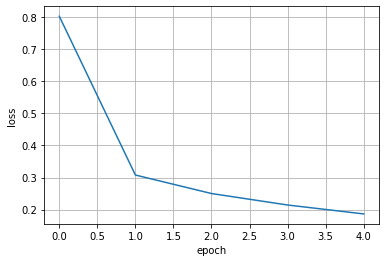

In [ ]:
plt.plot(range(epochs), loss_epoch)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

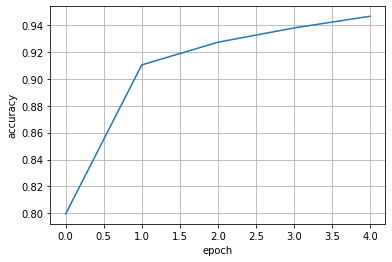

In [ ]:
plt.plot(range(epochs), acc_epoch)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

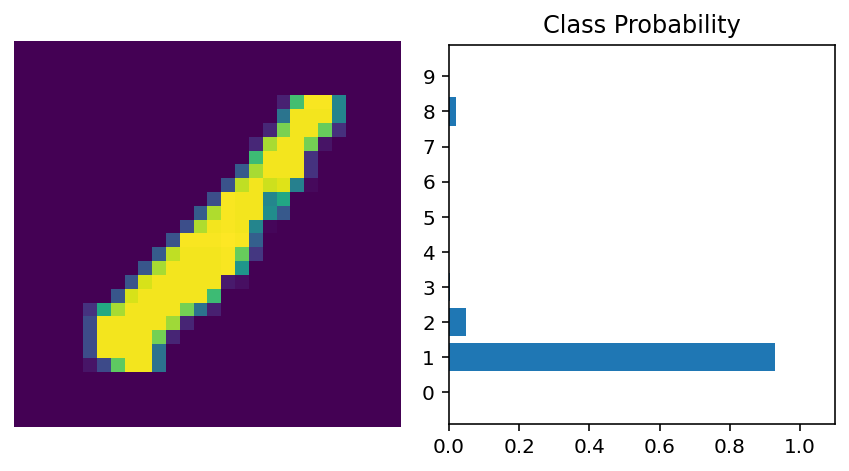

In [45]:
from pyparsing import helpers
%config InlineBackend.figure_format = 'retina'

images, labels = next(iter(trainloader))

img = images[0].view(1,784)
#turn off gradients to speed up this part
with torch.no_grad():
  logps=model(img)

#Output of the network are Log-probabilities, need to take exponential for probabilities
ps = softmax(logps)
view_classify(img.view(1,28,28),ps)